# Regression and classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display, Math
from ml.data import create_lineal_data, create_sinusoidal_data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
plt.style.use(u'seaborn')


%matplotlib inline

## Linear Regression

In regression problems target value is continuously varying variable.

 Linear regression
* y = ax + b       where  y = target, x = feature and a = parameter of model
* We choose parameter of model(a) according to minimum error function that is lost function
* In linear regression we use Ordinary Least Square (OLS) as lost function.

 We´ll start with a simple example, suppose we have some data (the blue dots), that we want to approximate with a linear function (ideally the points will be the green line). But remember we DON'T know the green line, we would want to find a linear function as close as that one.

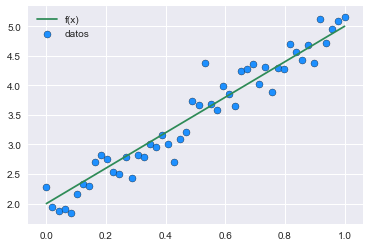

In [2]:
slope = 3
bias = 2
X, y = create_lineal_data(slope, bias, 0.25)
_, f_x = create_lineal_data(slope, bias, 0)

plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.plot(X, f_x, color="seagreen", label="f(x)")
plt.legend()
plt.show()

For this we can use the LinearRegression implementation from scikitlearn. We start creating a linear model:

In [3]:
model= LinearRegression()

Now, we have to give the data to the LinearRegression with the fit method:

In [4]:
model.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

And... that´s all :P Assuming you know the theory behind, scikitlearn take care of all the computations for you.
You can get the parameters of the linear function with:

In [5]:
model.coef_, model.intercept_

(array([[3.19061682]]), array([1.88326546]))

So, the equation of the line would be:

In [6]:
display(Math(r" y= {:2f} x +  {:2f}".format(model.coef_[0][0], model.intercept_[0])))

<IPython.core.display.Math object>

### Visualization

We can plot the line we calculated (the red one) and we´ll see that is really close to the green one, that was our target.

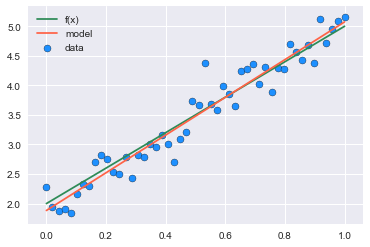

In [7]:
plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="data")
plt.plot(X, f_x, color="seagreen", label="f(x)")
plt.plot(X, model.predict(X.reshape(-1,1)), color="tomato", label="model")
plt.legend()
plt.show()

## Polynomial regression

Now, we´ll try to aprproximate the function $\sin(2\pi x)$, but now instead of a linear function we´ll use a polynomial.

$$p(x)=a_n x^{n} + a_{n-1} x^{n-1}+ \ldots + a_1x + a_0.$$
Again we have the function we want to approximate, but remember that this is just an example, in real life we only will have the points, that as you can see could have some variations, maybe for some error in medition, noise, bad annotation, or some reason.

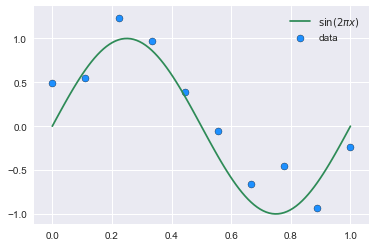

In [8]:
X, y = create_sinusoidal_data(0.25, 10)
X_sin, f_x_sin = create_sinusoidal_data(0, 100)

plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="data")
plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
plt.legend()
plt.show()


First, let´s see what happens if we try to use linear regression

In [9]:
mod_lin=LinearRegression()
model.fit(X.reshape(-1,1),y.reshape(-1,1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

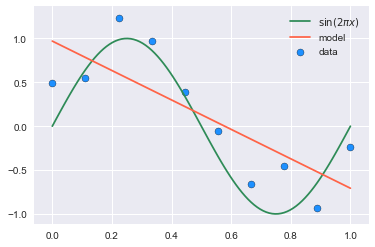

In [10]:
plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="data")
plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
plt.plot(X, model.predict(X.reshape(-1,1)), color="tomato", label="model")
plt.legend()
plt.show()

We can see that the best linear approximation isn´t that good, so we have to tray other thing.

### Now we can plot some other results, changing the degree of the polynomial and see what happens.

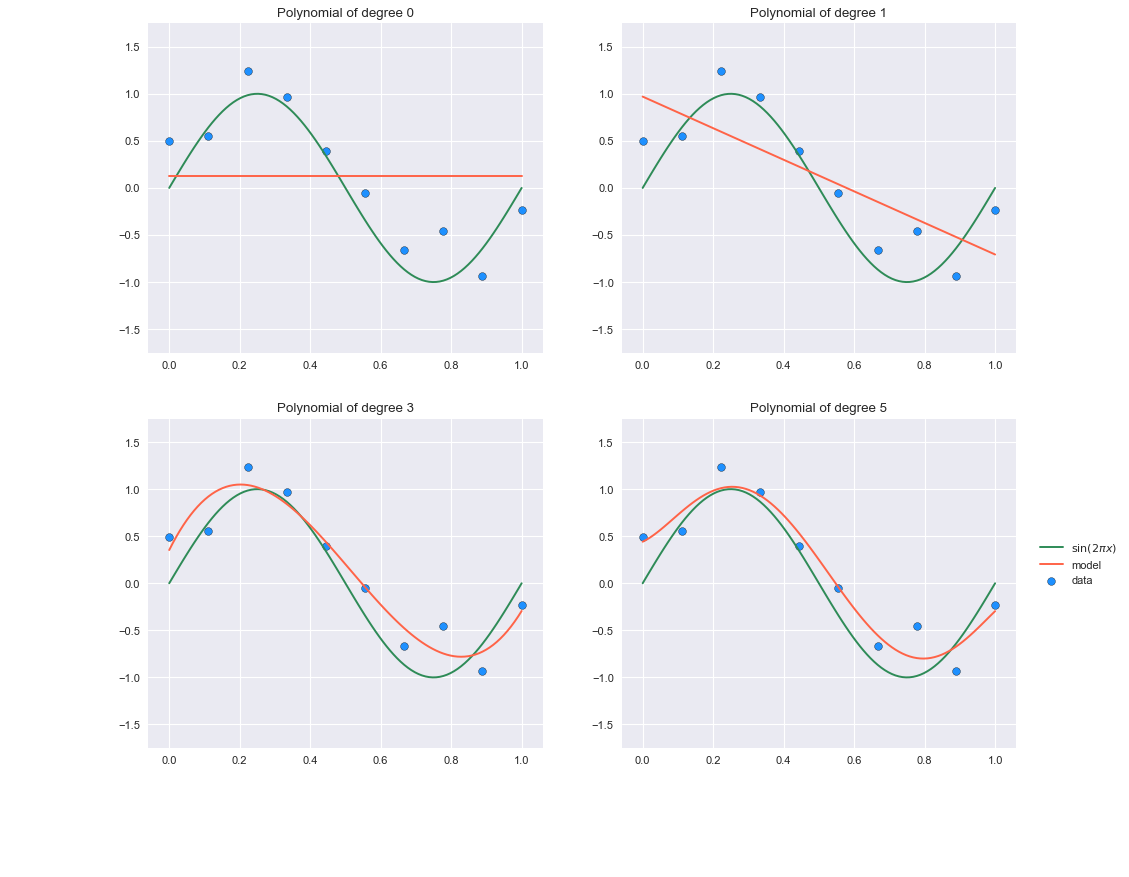

In [13]:
plt.figure(figsize=(14, 12), dpi= 80, facecolor='w', edgecolor='k')

for i, degree in enumerate([0, 1, 3, 5]):
    plt.subplot(2, 2, i + 1)
    lin_regressor = LinearRegression()

    # pass the order of your polynomial here  
    poly = PolynomialFeatures(degree)

    # convert to be used further to linear regression
    X_transform = poly.fit_transform(X.reshape(-1, 1))
    X_sin_transform=poly.fit_transform(X_sin.reshape(-1, 1))

    # fit this to Linear Regressor
    lin_regressor.fit(X_transform,y) 


    plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="data")
    plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
    plt.plot(X_sin, lin_regressor.predict(X_sin_transform), color="tomato", label="model")
    plt.ylim(-1.75, 1.75)
    plt.title("Polynomial of degree %d" % degree)
    plt.annotate("M={}".format(degree), xy=(-0.15, 1))

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()

### You can try on your own, whit different degrees, what changes? What degree you think that would be better to aproximate the data?

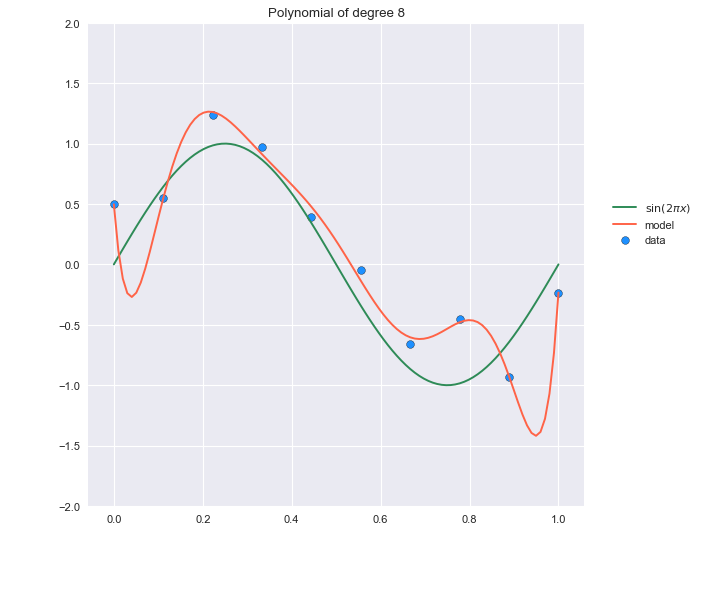

In [14]:
degree= 8

plt.figure(figsize=(8, 8), dpi= 80, facecolor='w', edgecolor='k')


lin_regressor = LinearRegression()

 # pass the order of your polynomial here  
poly = PolynomialFeatures(degree)

# convert to be used further to linear regression
X_transform = poly.fit_transform(X.reshape(-1, 1))

# fit this to Linear Regressor
lin_regressor.fit(X_transform,y) 


plt.scatter(X, y, facecolor="dodgerblue", edgecolor="k", label="data")
plt.plot(X_sin, f_x_sin, color="seagreen", label="$\sin(2\pi x)$")
plt.plot(X_sin, lin_regressor.predict(poly.fit_transform(X_sin.reshape(-1, 1))), color="tomato", label="model")
plt.ylim(-2, 2)
plt.title("Polynomial of degree %d" % degree)
plt.annotate("M={}".format(degree), xy=(-0.15, 1))

plt.legend(bbox_to_anchor=(1.05, 0.64), loc=2, borderaxespad=0.)
plt.show()